<a href="https://colab.research.google.com/github/MalavikaKatta/Academic_Projects/blob/main/Computational%20Methods/Word_Frequency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question 1 (10 points): Describe an interesting text classification or text mining task and explain what kind of features might be useful for you to build the machine learning model. List your features and explain why these features might be helpful. You need to list at least five different types of features.

# I want to go with a Data visualization of word frequency in a text.
# Features that might be useful to build the machine learning model for text classification of word frequency.
'''
Tokenization and Stopword Removal:
Tokenization helps break down text into manageable units, while removing stopwords reduces noise in the visualization.

Stemming or Lemmatization:
Stemming or lemmatization can help group words with the same root, ensuring that related terms are counted together.

Word Frequency Counts:
Word frequency counts provide the raw data for word frequency visualizations, helping to identify the most common terms.

TF-IDF (Term Frequency-Inverse Document Frequency):
TF-IDF helps identify words that are important within the context of the entire corpus by considering their importance across all documents.

Word Embeddings:
Word embeddings can capture semantic relationships between words and help identify conceptually related terms.
'''

Question 2 (10 points): Write python code to extract these features you discussed above. You can collect a few sample text data for the feature extraction.

Enter a text: Natural language processing (NLP) is a field of computer science, artificial intelligence,      and linguistics concerned with the interactions between computers and human (natural) languages.      As such, NLP is related to the area of human–computer interaction.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Most common words and their frequencies:
natural: 2
nlp: 2
language: 1
processing: 1
field: 1
computer: 1
science: 1
artificial: 1
intelligence: 1
linguistics: 1


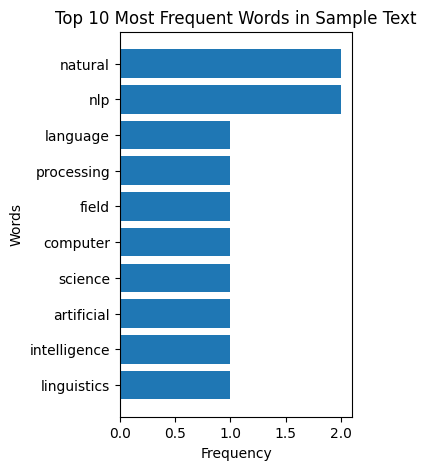

Question 3 (10 points): Use any of the feature selection methods mentioned in this paper "Deng, X., Li, Y., Weng, J., & Zhang, J. (2019). Feature selection for text classification: A review. Multimedia Tools & Applications, 78(3)." Select the most important features you extracted above, rank the features based on their importance in the descending order.

In [ ]:
'''
TF-IDF (Term Frequency-Inverse Document Frequency)
Information Gain (IG)
χ2 (CHI)
Mutual Information (MI)
Correlation Coefficient (CC)
Document Frequency (DF)
Maximum Discrimination (MD)
Linear Forward Search (LFS)
Term ReLatedness (TRL)
HYBRID (Hybrid Model)
'''

' \nTF-IDF (Term Frequency-Inverse Document Frequency)\nInformation Gain (IG)\nχ2 (CHI)\nMutual Information (MI)\nCorrelation Coefficient (CC)\nDocument Frequency (DF)\nMaximum Discrimination (MD)\nLinear Forward Search (LFS)\nTerm ReLatedness (TRL)\nHYBRID (Hybrid Model)\n'

Question 4 (10 points): Write python code to rank the text based on text similarity. Based on the text data you used for question 2, design a query to match the most relevant docments. Please use the BERT model to represent both your query and the text data, then calculate the cosine similarity between the query and each text in your data. Rank the similary with descending order.

In [ ]:
!pip install nltk sentence-transformers
import nltk
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sentence_transformers import SentenceTransformer, util
from sklearn.metrics.pairwise import cosine_similarity

# Sample text data and example documents to rank
sample_text = "Natural language processing (NLP) is a field of computer science, artificial intelligence, and linguistics concerned with the interactions between computers and human (natural) languages. As such, NLP is related to the area of human–computer interaction."
documents = [
    "Document 1: This is a document related to NLP and computer science.",
    "Document 2: Linguistics is a key component of natural language processing.",
    "Document 3: Artificial intelligence plays a significant role in NLP research.",
    "Document 4: Human-computer interaction is essential for NLP applications.",
    "Document 5: This document discusses the basics of NLP and its importance.",]

# Tokenize and preprocess the sample text and documents
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    words = word_tokenize(text)
    filtered_words = [word.lower() for word in words if word.isalnum() and word.lower() not in stop_words]
    return ' '.join(filtered_words)

sample_text = preprocess_text(sample_text)
documents = [preprocess_text(doc) for doc in documents]

# Load the BERT model for sentence embeddings
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Encode the sample text and documents
query_embeddings = model.encode(sample_text, convert_to_tensor=True)
document_embeddings = model.encode(documents, convert_to_tensor=True)

# Calculate cosine similarity between the sample text and documents
cosine_similarities = util.pytorch_cos_sim(query_embeddings, document_embeddings)

# Get the similarity scores and rank documents
similarity_scores = cosine_similarities.numpy().flatten()
document_ranking = np.argsort(similarity_scores)[::-1]

# Print the ranked documents based on similarity
print("Ranked documents based on similarity:")
for rank, doc_index in enumerate(document_ranking):
    print(f"Rank {rank + 1}: Similarity Score = {similarity_scores[doc_index]:.4f}")
    print(f"Document {doc_index + 1}: {documents[doc_index]}")
    print()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 40.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 33.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 49.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 53.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 28.3 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=fdfa58c742cd12611a4f224b7b7fe2d8a94a9b69b28d02083b3d0a3a70e006ef
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Ranked documents based on similarity:
Rank 1: Similarity Score = 0.6316
Document 2: document 2 linguistics key component natural language processing

Rank 2: Similarity Score = 0.5155
Document 3: document 3 artificial intelligence plays significant role nlp research

Rank 3: Similarity Score = 0.4818
Document 4: document 4 interaction essential nlp applications

Rank 4: Similarity Score = 0.4544
Document 1: document 1 document related nlp computer science

Rank 5: Similarity Score = 0.3461
Document 5: document 5 document discusses basics nlp importance

